# About

Theoretical plots of the analysis pertaining to the N-dimensional Kuramoto system with adaptive delays. Does not require any exported numerical simulations from MATLAB scripts.

Uses the following packages and functions:

funlib:
 - Omega2D
 - eig2D_cubic
 - eig2D_det

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Generate arrays to plot

## Parameters

In [2]:
g = 1.5
omega0 = w0 = 1.0
gain = 50
tau0 = 0.1

# Parameter dictionary
param = {'g': g,
         'omega0': omega0,
         'gain': gain,
         'tau0': tau0
         }

# Settings
steps = 200

## Synchronization states

In [3]:
# Fixed-point functions
Omega_fun = lambda Omega, delta2: funlib.Omega_infty(Omega, delta2, param, L=2*pi, steps=steps) - Omega
# Omega_fun_asy = lambda Omega, delta2: eigenlib.Omega_infty_asy(Omega, delta2, param, deg_sin=50) - Omega

# Generate error meshes of Omega_fun
part_Omega = 200
part_delta = 200

cap = 0.5

# Processing function
z_fun = lambda x: x

# Generate error meshes
Omega_arr = np.linspace(w0 - g, w0 + g, num=part_Omega)
delta_arr = np.linspace(0,0.5, num=part_delta)
delta_mesh, Omega_mesh = np.meshgrid(delta_arr, Omega_arr)

err_mesh = np.zeros(Omega_mesh.shape)
for j in range(Omega_arr.size):
    for k in range(delta_arr.size):
        new_err = Omega_fun(Omega_mesh[j,k], delta_mesh[j,k]**2)
        err_mesh[j,k] = np.max((np.min((new_err, cap)), -cap))
    
z_mesh = z_fun(err_mesh)
# z_mesh = z_mesh / np.abs(z_mesh).max()

# Set the limits of the plot to the limits of the data
Omega_min = Omega_mesh.min()
Omega_max = Omega_mesh.max()
delta_min = delta_mesh.min()
delta_max = delta_mesh.max()
z_bound = np.abs(z_mesh).max()

In [ ]:
# Generate arrays for Omega w.r.t. fixed delta:
delta_list = [0.05, 0.1, 0.2, 0.4]
z_arrs = {}

# For each delta_list, obtain corresponding Omega array:
for delta0 in delta_list:
    ind = np.argmin(np.abs(delta_arr - delta0))
    z_arrs[ind] = z_mesh[:,ind]
    
# Obtain Omega = Omega(delta) function
Omega_roots = np.zeros(delta_arr.size+1)
Omega_roots[0] = w0

for k in range(delta_arr.size):
    deltak = delta_arr[k]
    Omega_funk = lambda Omega: Omega_fun(Omega, deltak**2)
    new_root = rootlib.find_root(Omega_funk, Omega_roots[k], w0-g, w0+g, steps=100)
    if new_root[1]:
        Omega_roots[k+1] = new_root[0]

Omega_roots = Omega_roots[1:]

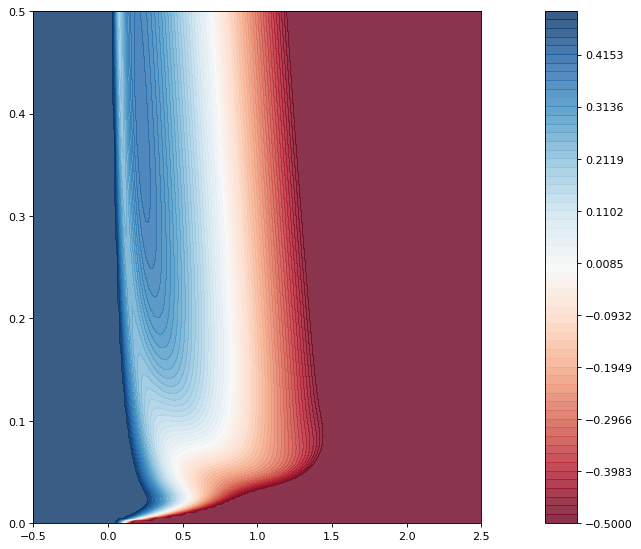

In [4]:
fig, ax = plt.subplots(2, figsize=(8, 8), dpi=80)

ax[0].set_position(bbox0)
ax[1].set_position(bbox1)

c = ax[0].contourf(Omega_mesh, delta_mesh, z_mesh, levels, cmap='RdBu', alpha=alpha)
ax[0].axis([Omega_min, Omega_max, delta_min, delta_max])

# Colourbar
fig.colorbar(c, cax=ax[1]) 

## Synchronization states

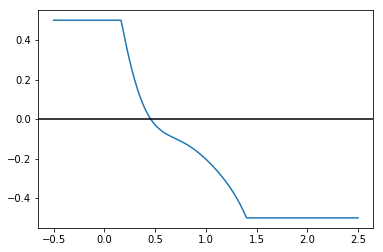

In [5]:
# Horizontal slice
delta0 = 0.06

# Find index
ind = np.argmin(np.abs(delta_arr - delta0))

fig, ax = plt.subplots(1,1)

ax.plot(Omega_arr, z_mesh[:,ind])
ax.axhline(y=0, color='black')

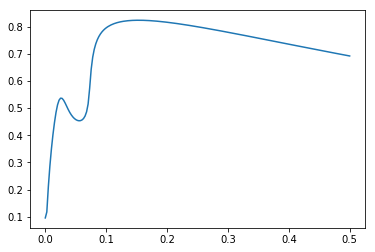

In [6]:
# Obtain Omega = Omega(delta) function
Omega_roots = np.zeros(delta_arr.size+1)
Omega_roots[0] = w0

for k in range(delta_arr.size):
    deltak = delta_arr[k]
    Omega_funk = lambda Omega: Omega_fun(Omega, deltak**2)
    new_root = rootlib.find_root(Omega_funk, Omega_roots[k], w0-g, w0+g, steps=100)
    if new_root[1]:
        Omega_roots[k+1] = new_root[0]
        
Omega_roots = Omega_roots[1:]

fig, ax = plt.subplots(1,1)

ax.plot(delta_arr, Omega_roots)
# ax.axvline(x=0.06907494896397551)

## Eigenvalues

-1.872210148252807e-15
[-8.88178420e-16 -4.74401028e-01 -1.03856704e-02 -2.35566670e-04]


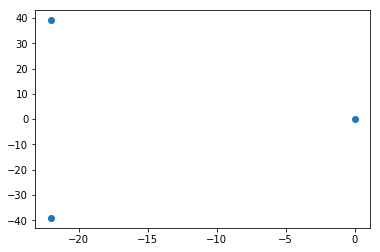

In [13]:
# Choose a point (perhaps test in a radius around theoretical stable points?)
delta20 = 0.07407992824648583**2
Omega0 = 0.7548675374459954

# Numerical options
steps = 1000
L = 4*pi
deg = 3
R = 10

# Error function
err_fun = lambda z: eigenlib.eig_infty_scale(z, Omega, delta2, param, deg=deg, R=R, L=L, steps=steps) - z
eig_terms2 = eigenlib.eig_infty_terms(deg, Omega0, delta20, param, R=1, L=pi, steps=steps)

coeffs2 = eig_terms2[0]
coeffs2[1] += -1
coeffs2[0] += -eig_terms2[2]

Omega0_eig_roots = np.roots(np.flip(coeffs2,0))
max_real = np.max(np.real(Omega0_eig_roots))
print(max_real)
print(coeffs2)

fig, ax = plt.subplots(1,1)

ax.scatter(np.real(Omega0_eig_roots), np.imag(Omega0_eig_roots))

0.7865515397244245
0.09547738693467336


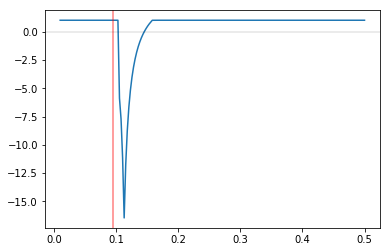

In [15]:
delta_arr = delta_arr[1:]
Omega_roots = Omega_roots[1:]

# Find delta closest to Omega:
Omega0 = 0.8
delta0 = 0.06907992824648583

ind0 = np.argmin(np.abs(Omega_roots - Omega0)**2 + np.abs(delta_arr - delta0)**2)

Omega1 = Omega_roots[ind0]
delta1 = delta_arr[ind0]

real_max = np.zeros(delta_arr.size)

for k in range(delta_arr.size):
    delta2 = delta_arr[k]**2
    Omega = Omega_roots[ind]
    
    eig_terms = eigenlib.eig_infty_terms(deg, Omega, delta2, param, R=1, L=pi, steps=steps)
    coeffs = eig_terms[0]
    coeffs[1] += -1
    coeffs[0] += -eig_terms[2]
    
    # Filter out any roots close to 0
    eig_roots = np.roots(np.flip(coeffs,0))
    eig_roots = eig_roots[np.abs(eig_roots) > 1e-14]
    
    max_real = np.max(np.real(eig_roots))
    real_max[k] = np.min((max_real,10))
    
fig, ax = plt.subplots(1,1)

ax.plot(delta_arr, real_max)
ax.axvline(x=delta1, color='red', alpha=0.5)
ax.axhline(y=0, color='black', alpha=0.1)

print(Omega1)
print(delta1)

### Eigenvalue plot for 1st synchronization state

# Plot

## Plot options

In [10]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.1, 0.1, 0.7, 0.8]  # Fig 2a: Synchronization states (roots of R_gain)
bbox1 = [0.9, 0.1, 0.05, 0.8] 

alpha = 0.8
levels = np.linspace(-z_bound, z_bound, 60)

# Axis lines
eig_options_line = {'linestyle': 'dashed',
                    'linewidth': 0.5,
                    'color': 'white'
                    }

## Generate figure